# Setup

In [2]:
import pandas as pd
import numpy as np

from pathlib import Path

from eval_funcs import (
        perplexity_for_corpora,
        wasserstein_distance_embeddings,
        classify_real_vs_synth,
        compute_stat_properties,
        compute_opt_embeddings
    )

# Import Real Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gowrishankarp/newspaper-text-summarization-cnn-dailymail")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\loren\.cache\kagglehub\datasets\gowrishankarp\newspaper-text-summarization-cnn-dailymail\versions\2


In [4]:
cnn_train = pd.read_csv(r'C:\Users\loren\.cache\kagglehub\datasets\gowrishankarp\newspaper-text-summarization-cnn-dailymail\versions\2\cnn_dailymail\train.csv')

In [5]:
cnn_train.head(2)

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...


# Import TinyLlama Synthetic Dataset

In [6]:
tinyllama_data = pd.read_csv('../tinyllama_outputs.csv').drop('Unnamed: 0', axis=1)

In [7]:
tinyllama_data.head(2)

,uuid,topic,generated_article,elapsed_time
0,00b75438-5d31-4f38-add3-f873c44fdb65,Politics - Elections,"Fearing a catastrophic defeat at the polls, US...",5.364199
1,3a1296a5-83f0-4945-a105-74a1117758b6,World - Middle East,Bombarded by violent attacks in mid-East: CNN ...,4.014536


In [8]:
tinyllama_data['generated_article'].shape

(1000,)

In [9]:
tinyllama_data['generated_article'].str.split(' ').transform(lambda x: len(x)).max()

2396

# Run Eval Functions

### Running Statistical Properties Metrics on TinyLlama Data

In [10]:
stats = compute_stat_properties(tinyllama_data['generated_article'], max_length=4096)

In [11]:
stats

{'avg_len_tokens': 825.7349853515625,
 'std_len_tokens': 352.1277160644531,
 'avg_len_chars': 4039.864,
 'ttr': 0.031341774298049616,
 'hapax_ratio': 0.26866306027820713}

### Running Perplexity Scores

In [12]:
ppl = perplexity_for_corpora(cnn_train['article'].sample(1000, random_state=42), tinyllama_data['generated_article'], batch_size=8, max_length=2048)

[perplexity] device=cuda batch_size=8 max_length(requested)=2048 max_length(effective)=2048
[perplexity] num_docs: real=1000 synthetic=1000 total_batches=250


c:\Users\loren\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\opt\modeling_opt.py:341: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


[perplexity] progress 5/250 | elapsed=8.6s | avg/batch=1.72s | ETA~422.1s
[perplexity] progress 10/250 | elapsed=13.6s | avg/batch=1.36s | ETA~327.0s
[perplexity] progress 15/250 | elapsed=19.1s | avg/batch=1.27s | ETA~299.0s
[perplexity] progress 20/250 | elapsed=23.8s | avg/batch=1.19s | ETA~273.7s
[perplexity] progress 25/250 | elapsed=30.7s | avg/batch=1.23s | ETA~275.9s
[perplexity] progress 30/250 | elapsed=34.4s | avg/batch=1.15s | ETA~252.6s
[perplexity] progress 35/250 | elapsed=39.4s | avg/batch=1.13s | ETA~242.1s
[perplexity] progress 40/250 | elapsed=44.4s | avg/batch=1.11s | ETA~233.0s
[perplexity] progress 45/250 | elapsed=49.4s | avg/batch=1.10s | ETA~225.2s
[perplexity] progress 50/250 | elapsed=56.0s | avg/batch=1.12s | ETA~224.1s
[perplexity] progress 55/250 | elapsed=63.4s | avg/batch=1.15s | ETA~224.7s
[perplexity] progress 60/250 | elapsed=68.4s | avg/batch=1.14s | ETA~216.5s
[perplexity] progress 65/250 | elapsed=74.5s | avg/batch=1.15s | ETA~212.2s
[perplexity] p

In [13]:
ppl

{'real': {'corpus_ppl': 20.093418953077368},
 'synthetic': {'corpus_ppl': 15.954454026445283}}

### Running Wasserstein Distance

In [14]:
wd = wasserstein_distance_embeddings(cnn_train['article'].sample(1000, random_state=42), tinyllama_data['generated_article'], n_projections=128)

[embed:real] device=cuda batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real] progress 5/125 | elapsed=2.6s | avg/batch=0.51s | ETA~61.5s
[embed:real] progress 10/125 | elapsed=5.2s | avg/batch=0.52s | ETA~59.9s
[embed:real] progress 15/125 | elapsed=8.2s | avg/batch=0.55s | ETA~60.2s
[embed:real] progress 20/125 | elapsed=10.7s | avg/batch=0.53s | ETA~55.9s
[embed:real] progress 25/125 | elapsed=13.5s | avg/batch=0.54s | ETA~53.9s
[embed:real] progress 30/125 | elapsed=15.7s | avg/batch=0.52s | ETA~49.8s
[embed:real] progress 35/125 | elapsed=18.2s | avg/batch=0.52s | ETA~46.9s
[embed:real] progress 40/125 | elapsed=20.8s | avg/batch=0.52s | ETA~44.2s
[embed:real] progress 45/125 | elapsed=23.3s | avg/batch=0.52s | ETA~41.4s
[embed:real] progress 50/125 | elapsed=26.4s | avg/batch=0.53s | ETA~39.7s
[embed:real] progress 55/125 | elapsed=29.5s | avg/batch=0.54s | ETA~37.5s
[embed:real] progress 60/125 | elapsed=32.0s | avg/batch=0.53s | ETA~34.7s
[embed:rea

In [15]:
wd

{'mean_distance': 0.18677199570207928,
 'distances': [0.03386680243086891,
  0.13545763071156314,
  0.05560612915598394,
  0.11469221387437938,
  0.16262268942037883,
  0.07505124159315679,
  0.17207024716239072,
  0.14755202405419743,
  0.29010557784006163,
  0.22645292630094083,
  0.15862075507372556,
  0.3991889076570622,
  0.01349262700678944,
  0.03022434033998387,
  0.5015110460533206,
  0.22782751710933058,
  0.06646386675173015,
  0.32162927963660026,
  0.05530110350177157,
  0.12391061870170042,
  0.15335110849796013,
  0.24391709586479415,
  0.07359275165058485,
  0.09087225088091751,
  0.2608741821658789,
  0.09904382957606749,
  0.027911155972345975,
  0.10393881749158124,
  0.26968685000376047,
  0.09211645534357973,
  0.06583862784712036,
  0.04253818242350693,
  0.2785969844820127,
  0.18767998163979066,
  0.3047907937181493,
  0.05931221067392144,
  0.21785647935635039,
  0.26609346102297105,
  0.3155713033517564,
  0.03842402754561618,
  0.15832716226575327,
  0.191912

### Runnning Classification (Real vs. Synthetic)

In [16]:
clf_res = classify_real_vs_synth(cnn_train['article'].sample(1000, random_state=42), tinyllama_data['generated_article'], cv=5)

[classify] batch_size=8 max_length=2048 cv=5 Cs=[0.1, 0.5, 1.0, 2.0, 5.0]
[embed:real] device=cuda batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real] progress 5/125 | elapsed=2.7s | avg/batch=0.54s | ETA~65.2s
[embed:real] progress 10/125 | elapsed=5.5s | avg/batch=0.55s | ETA~62.8s
[embed:real] progress 15/125 | elapsed=8.6s | avg/batch=0.57s | ETA~62.9s
[embed:real] progress 20/125 | elapsed=11.1s | avg/batch=0.56s | ETA~58.4s
[embed:real] progress 25/125 | elapsed=14.0s | avg/batch=0.56s | ETA~56.0s
[embed:real] progress 30/125 | elapsed=16.3s | avg/batch=0.54s | ETA~51.6s
[embed:real] progress 35/125 | elapsed=18.9s | avg/batch=0.54s | ETA~48.5s
[embed:real] progress 40/125 | elapsed=21.5s | avg/batch=0.54s | ETA~45.7s
[embed:real] progress 45/125 | elapsed=24.1s | avg/batch=0.53s | ETA~42.8s
[embed:real] progress 50/125 | elapsed=27.2s | avg/batch=0.54s | ETA~40.9s
[embed:real] progress 55/125 | elapsed=30.3s | avg/batch=0.55s | ETA~38.6s
[embed:real

In [17]:
clf_res

{'metrics': {'accuracy': 1.0, 'macro_f1': 1.0, 'roc_auc': 1.0},
 'report': {'real': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0},
  'synthetic': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 200.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 400.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 400.0}},
 'embeddings_shape': (2000, 768),
 'classifier': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregressioncv',
                  LogisticRegressionCV(Cs=[0.1, 0.5, 1.0, 2.0, 5.0], cv=5,
                                       max_iter=5000, n_jobs=-1,
                                       scoring='roc_auc', solver='saga'))])}

# Visualize?

Article Length

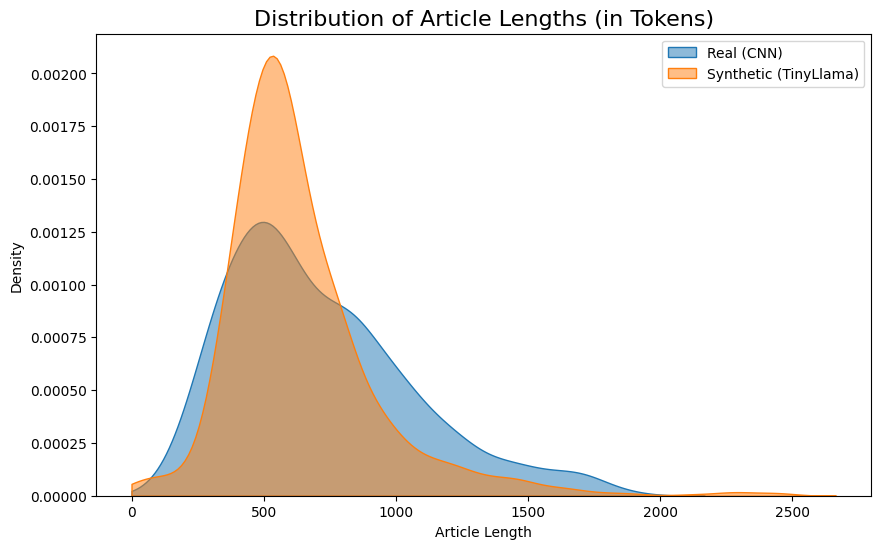

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample real data to match synthetic data size
real_texts = cnn_train['article'].sample(1000, random_state=42)
synth_texts = tinyllama_data['generated_article']

len_real = real_texts.str.split().str.len()
len_synth = synth_texts.str.split().str.len()

# Create the plot
plt.figure(figsize=(10, 6))
sns.kdeplot(len_real, label='Real (CNN)', fill=True, alpha=0.5, clip=(0, 4000))
sns.kdeplot(len_synth, label='Synthetic (TinyLlama)', fill=True, alpha=0.5, clip=(0, 4000))

plt.title('Distribution of Article Lengths (in Tokens)', fontsize=16)
plt.xlabel('Article Length')
plt.ylabel('Density')
plt.legend()
folder_path = "./figures/tinyllama"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path + '/article_length_distribution.png')
plt.show()

Perplexity

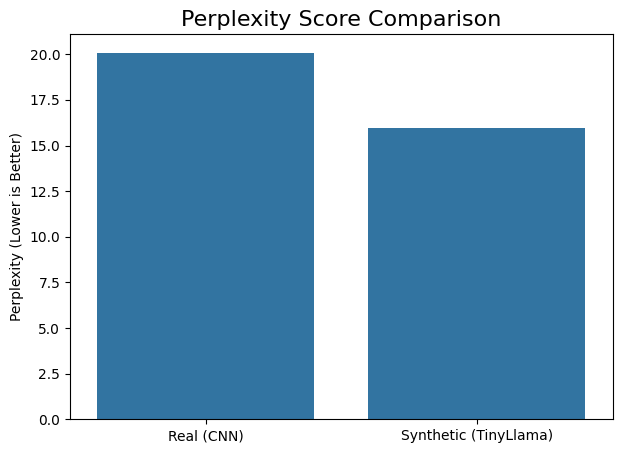

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get the data from your 'ppl' variable
ppl_scores = {
    'Real (CNN)': ppl['real']['corpus_ppl'],
    'Synthetic (TinyLlama)': ppl['synthetic']['corpus_ppl']
}

# 2. Create the plot
plt.figure(figsize=(7, 5))
sns.barplot(x=list(ppl_scores.keys()), y=list(ppl_scores.values()))

plt.title('Perplexity Score Comparison', fontsize=16)
plt.ylabel('Perplexity (Lower is Better)')
folder_path = "./figures/tinyllama"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/perplexity_comparison.png')
plt.show()

Wasserstein Distance

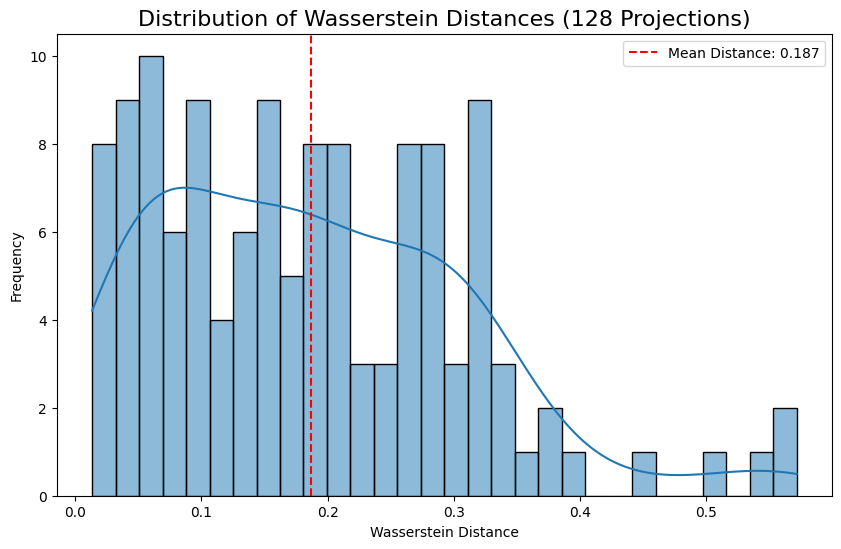

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get data from 'wd'
distances = wd['distances']
mean_dist = wd['mean_distance']

# Create plot
plt.figure(figsize=(10, 6))
sns.histplot(distances, bins=30, kde=True)

plt.axvline(mean_dist, color='red', linestyle='--', label=f'Mean Distance: {mean_dist:.3f}')
plt.title('Distribution of Wasserstein Distances (128 Projections)', fontsize=16)
plt.xlabel('Wasserstein Distance')
plt.ylabel('Frequency')
plt.legend()
folder_path = "./figures/tinyllama"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/wasserstein_distance_distribution.png')
plt.show()

Classifier: t-SNE Plot of Real vs. Synthetic Embeddings

Computing embeddings for REAL texts (for t-SNE)...
[embed:real_tsne] device=cuda batch_size=8 max_length(req)=2048 max_length(eff)=2048 num_docs=1000
[embed:real_tsne] progress 5/125 | elapsed=2.8s | avg/batch=0.56s | ETA~67.2s
[embed:real_tsne] progress 10/125 | elapsed=5.4s | avg/batch=0.54s | ETA~62.5s
[embed:real_tsne] progress 15/125 | elapsed=8.4s | avg/batch=0.56s | ETA~61.7s
[embed:real_tsne] progress 20/125 | elapsed=10.9s | avg/batch=0.54s | ETA~57.2s
[embed:real_tsne] progress 25/125 | elapsed=13.7s | avg/batch=0.55s | ETA~54.8s
[embed:real_tsne] progress 30/125 | elapsed=16.0s | avg/batch=0.53s | ETA~50.6s
[embed:real_tsne] progress 35/125 | elapsed=18.6s | avg/batch=0.53s | ETA~47.9s
[embed:real_tsne] progress 40/125 | elapsed=21.3s | avg/batch=0.53s | ETA~45.3s
[embed:real_tsne] progress 45/125 | elapsed=23.9s | avg/batch=0.53s | ETA~42.5s
[embed:real_tsne] progress 50/125 | elapsed=27.2s | avg/batch=0.54s | ETA~40.8s
[embed:real_tsne] progress 55/125 | elapsed=30.4s | av

c:\Users\loren\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


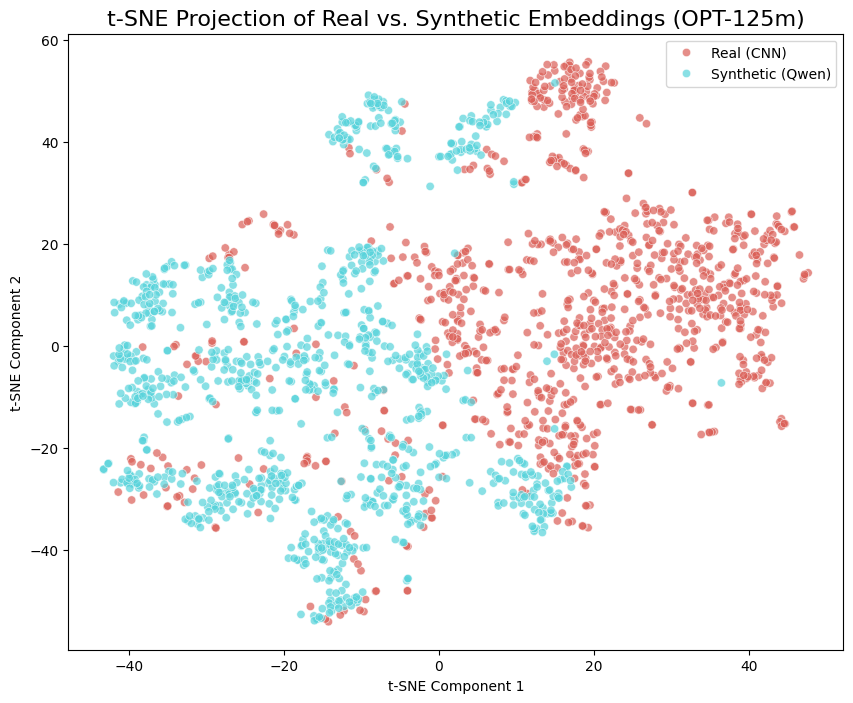

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

# Compute embeddings

real_texts = cnn_train['article'].sample(1000, random_state=42)
synth_texts = tinyllama_data['generated_article']

print("Computing embeddings for REAL texts (for t-SNE)...")
Er = compute_opt_embeddings(
    real_texts, 
    batch_size=8, 
    max_length=2048, 
    verbose=True, 
    label="real_tsne"
)

print("\nComputing embeddings for SYNTHETIC texts (for t-SNE)...")
Es = compute_opt_embeddings(
    synth_texts, 
    batch_size=8, 
    max_length=2048, 
    verbose=True, 
    label="synth_tsne"
)

# Combine embeddings and create labels
embeddings = np.concatenate([Er, Es], axis=0)
labels = ['Real (CNN)'] * len(Er) + ['Synthetic (Qwen)'] * len(Es)

print(f"\nRunning t-SNE on {embeddings.shape[0]} embeddings")

# Reduce 768 dimensions down to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(embeddings)

# Create dataframe and plot

df_tsne = pd.DataFrame({
    'tsne_1': tsne_results[:, 0],
    'tsne_2': tsne_results[:, 1],
    'label': labels
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='label',
    palette=sns.color_palette("hls", 2),
    data=df_tsne,
    alpha=0.7
)

plt.title('t-SNE Projection of Real vs. Synthetic Embeddings (OPT-125m)', fontsize=16)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(loc='best')
folder_path = "./figures/tinyllama"
folder = Path(folder_path)
folder.mkdir(parents=True, exist_ok=True)
plt.savefig(folder_path+'/tsne_embeddings.png')
plt.show()